In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from PreprocessData.text_preprocessing import preprocess_text

In [11]:
ratings = pd.read_csv('../Data/not_spare_rating.csv')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20849 entries, 0 to 20848
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_id   20849 non-null  int64 
 1   content      10637 non-null  object
 2   customer_id  20849 non-null  int64 
 3   user_name    20802 non-null  object
 4   stars        20849 non-null  int64 
 5   comment_id   20849 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 977.4+ KB


In [8]:
content_data = pd.read_csv('../Data/clean_books.csv', usecols=['id', 'name', 'book_cover', 'price', 'rating_average', 'review_count', 'order_count', 'description', 'authors', 'publisher', 'big_category', 'sub_category'])
content_data.head(40)

id                                               name book_cover  \
0   58390336                                      Python cơ bản    Bìa mềm   
1    1664525  Giáo Trình Kỹ Thuật Lập Trình C Căn Bản Và Nân...    Bìa mềm   
2   55573620  Giáo Trình Tự Học AutoCAD 2019 Thực Hành Bằng ...    Bìa mềm   
3   24889348  Lập trình hướng đối tượng JAVA core dành cho n...        NaN   
4   37667006  Combo Giáo Trình Kỹ Thuật Lập Trình C Căn Bản ...    Bìa mềm   
5   55582071  Thực Hành Microsoft Word - Excel - PowerPoint ...    Bìa mềm   
6   15734790                       Tự Học Photoshop CC Toàn Tập    Bìa mềm   
7   54389413       Tự Học Nhanh,Microsoft Office (Word - Excel)    Bìa mềm   
8   48982090  Ứng Dụng Casio Fx - 580Vn X Đối Với Các Môn TH...        NaN   
9   49895267  Tin Học Văn Phòng, Tự Học Excel Bằng Hình Ảnh ...    Bìa mềm   
10  25202283  Sách Lập trình với Scratch 3.0 (Dành cho học s...    Bìa mềm   
11  58709179  Sách Giải Nhanh Bài Thi Trắc Nghiệm Môn Toán V...        NaN   
12  50317469  Giáo Trình Thực Hành Microsoft Excel 2019 Căn ...    Bìa mềm   
13  48018642  Giáo Trình Thực Hành Excel - Dùng Cho Các Phiê...    Bìa mềm   
14  49895271                 Hướng Dẫn Sử Dụng Microsoft Office    Bìa mềm   
15  48754164           Lập Trình Với Scratch 3.0 (Tái Bản 2019)        NaN   
16  55695623  Sách Luyện thi hội thi tin học trẻ với Scratch...    Bìa mềm   
17  48753629  Hướng Dẫn Sử Dụng Máy Tính Khoa Học Casio Fx -...        NaN   
18   7611823                      Giáo Trình Coreldraw X7,X8&X9        NaN   
19  58708783  Chinh Phục Các Dạng Toán Thực Tế THCS Với Máy ...        NaN   
20  54389409  Giáo Trình Vi Điều Khiển ARM. Hướng Dẫn Sử Dụn...    Bìa mềm   
21  55025250                           Tự học lập trình Scratch    Bìa gập   
22  10123965  Vi Điều Khiển Và Ứng Dụng - Arduino Dành Cho N...    Bìa mềm   
23  23966746  Giáo Trình Thực Hành Thiết Kế Kiến Trúc Với  V...    Bìa mềm   
24   4106495          Photoshop Giáo Trình Xử Lý Ảnh CC-CS6-CS5    Bìa mềm   
25  36300315  Thực Hành Các Công Thức Và Hàm Excel 2016 Bằng...    Bìa mềm   
26  49895269                      Excel  Dành Cho Người Bắt Đầu    Bìa mềm   
27   4106563          Giáo Trình Thực Hành Photoshop CC-CS6-CS5    Bìa mềm   
28  11658897  Bộ sách Thế giới Hacker và An Toàn Thông Tin M...    Bìa mềm   
29  15734786               Lập Trình Với PLC S7 1200 Và S7 1500    Bìa mềm   
30  23966748                                   Lập Trình Với C#    Bìa mềm   
31  55054903  Giáo Trình Thực Hành Kiểm Thử Phần Mềm - Từng ...    Bìa mềm   
32  54389411                       Làm Phim Với Premiere Pro CC    Bìa mềm   
33  58723518                        Excel Dành Cho Người Tự Học    Bìa mềm   
34  51617979  KiểM Thử PhầN MềM - Từng Bước Trở Thành Te...        NaN   
35  54389407       Lập Trình Arduino Với IoT-Hệ Vạn Vật Kết Nối    Bìa mềm   
36   4396853  Hướng Dẫn Lập Trình Quản Lý Với Microsoft Access     Bìa mềm   
37  58457390  An Toàn Dữ Liệu - Mã Hóa Bảo Mật Thông Tin, An...    Bìa mềm   
38  54389415                           Arduino Và Lập Trình IoT    Bìa mềm   
39  28040139                           CCNA ROUTING & SWITCHING        NaN   

     price  rating_average  review_count  order_count  \
0   125000             4.8            32            0   
1    67500             4.5            82            0   
2   110000             4.7            10            0   
3   189000             4.7            86            0   
4   223400             4.3            21            0   
5    79000             4.4             3            0   
6    90000             4.7            12            0   
7   106080             3.9             8            0   
8   105600             5.0             6            0   
9    91120             4.3             7            0   
10  190000             4.7            32            0   
11  132000             4.7             3            0   
12  120000             4.5            13            0   
13   87750   

In [3]:
content_data.loc[content_data['id']==17536973]

id            sku  \
10329  17536973  9023511431393   

                                                    name  \
10329  Bài Giảng & Lời Giải Chi Tiết Tiếng Anh 10 (Tá...   

                                                url_path book_cover  \
10329  bai-giang-loi-giai-chi-tiet-tieng-anh-10-tai-b...    Bìa mềm   

                                       short_description  price  list_price  \
10329  Cuốn sách tổng hợp các kiến thức đã học cùng c...  71400       84000   

       price_usd  discount  ...  favourite_count  \
10329      3.052     12600  ...                1   

                                           thumbnail_url  \
10329  https://salt.tikicdn.com/cache/280x280/ts/prod...   

                        productset_group_name  \
10329  Sách Tham Khảo, Sách tham khảo cấp III   

                                             description         publisher  \
10329  Cuốn sách tổng hợp các kiến thức đã học cùng c...  Nhà Sách Hồng Ân   

                 authors stock_item    big_category             sub_category  \
10329   Hoàng Thái Dương        4.0  Sách Tham Khảo   Sách tham khảo cấp III   

                                       clean_description  
10329  sách tổng_hợp kiến_thức học dạng bài_tập kèm l...  

[1 rows x 24 columns]

In [4]:
# plt.figure(figsize=(30,20))
# sns.countplot(y='productset_group_name', data=content_data)

In [5]:
content_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10330 entries, 0 to 10329
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10330 non-null  int64  
 1   sku                    10330 non-null  int64  
 2   name                   10330 non-null  object 
 3   url_path               10330 non-null  object 
 4   book_cover             9417 non-null   object 
 5   short_description      10327 non-null  object 
 6   price                  10330 non-null  int64  
 7   list_price             10330 non-null  int64  
 8   price_usd              10330 non-null  float64
 9   discount               10330 non-null  int64  
 10  discount_rate          10330 non-null  int64  
 11  rating_average         10330 non-null  float64
 12  review_count           10330 non-null  int64  
 13  order_count            10330 non-null  int64  
 14  favourite_count        10330 non-null  int64  
 15  th

# Text Preprocessing

### Clean the description

In [6]:
# content_data['clean_description'] = content_data['description'].apply(lambda x: preprocess_text(str(x)))

In [7]:
# content_data.to_csv('../Data/clean_books.csv', index=False)

In [8]:
content_data.info()
content_data.dropna(subset=['clean_description'], axis=0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10330 entries, 0 to 10329
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10330 non-null  int64  
 1   sku                    10330 non-null  int64  
 2   name                   10330 non-null  object 
 3   url_path               10330 non-null  object 
 4   book_cover             9417 non-null   object 
 5   short_description      10327 non-null  object 
 6   price                  10330 non-null  int64  
 7   list_price             10330 non-null  int64  
 8   price_usd              10330 non-null  float64
 9   discount               10330 non-null  int64  
 10  discount_rate          10330 non-null  int64  
 11  rating_average         10330 non-null  float64
 12  review_count           10330 non-null  int64  
 13  order_count            10330 non-null  int64  
 14  favourite_count        10330 non-null  int64  
 15  th

# Recommend Engine

We are building two recommendation engines, one with a book title and another one with a book description. The model recommends a similar book based on title and description. Calculate the similarity between all the books using cosine similarity

## 1. Recommend base on TITLE

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import requests
from PIL import Image
from io import BytesIO
%matplotlib inline

In [10]:
#Converting the book title into vectors
tf = TfidfVectorizer()
tfidf_matrix = tf.fit_transform(content_data['name'])
sg = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [11]:
def recommend_by_title(data, title, genre=None, sub_genre=None):
    print(title)
    if genre and not sub_genre:
        print(genre)
        data = data.loc[data['big_category']==genre]
        data.reset_index(level=0, inplace=True)
    elif genre and sub_genre:
        data = data.loc[data['big_category']==genre].loc[data['sub_category']==sub_genre]
        data.reset_index(level=0, inplace=True)

    # convert the index to series
    indices = pd.Series(data.index, index=data['name'])

    #Converting the book title into vectors
    tf = TfidfVectorizer()
    tfidf_matrix = tf.fit_transform(data['name'])
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # get the index corresponding to original title
    idx = indices[title]

    # get the pairwise similarity score
    sig = list(enumerate(sg[idx]))

    # sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)

    # Scores of the most 5 similar books
    sig = sig[1:6]

    # book indices
    book_indices = [i[0] for i in sig]

    # top 5 
    rec = data[['name', 'thumbnail_url', 'big_category', 'sub_category']].iloc[book_indices]
    print(rec.drop('thumbnail_url', axis=1))
    # print
    for i in rec['thumbnail_url']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        print(plt.imshow(img))

In [12]:
def recommend_by_title_new(data, product_id):
    big_cate = data.loc[data['id']==product_id]['big_category'].values[0]
    title = data.loc[data['id']==product_id]['name'].values[0]
    data_big_cate = data.loc[data['big_category']==big_cate]
    data_big_cate.reset_index(level=0, inplace=True)

     # convert the index to series
    indices = pd.Series(data_big_cate.index, index=data_big_cate['name'])

    #Converting the book title into vectors
    tf = TfidfVectorizer()
    tfidf_matrix = tf.fit_transform(data_big_cate['name'])
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # get the index corresponding to original title
    idx = indices[title]

    # get the pairwise similarity score
    sig = list(enumerate(sg[idx]))

    # sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
    # Scores of the most 5 similar books
    sig = sig[1:20]

    # book indices
    book_indices = [i[0] for i in sig]

    rec = data_big_cate[['name', 'thumbnail_url', 'big_category', 'sub_category']].iloc[book_indices]
    print(rec.drop('thumbnail_url', axis=1))

In [19]:
def recommend_by_title_v2(data, product_id):
    big_cate = data.loc[data['id']==product_id]['big_category'].values[0]
    title = data.loc[data['id']==product_id]['name'].values[0]
    # data_big_cate = data.loc[data['big_category']==big_cate]
    # data_big_cate.reset_index(level=0, inplace=True)

     # convert the index to series
    indices = pd.Series(data.index, index=data['name'])

    #Converting the book title into vectors
    tf = TfidfVectorizer()
    tfidf_matrix = tf.fit_transform(data['name'])
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # get the index corresponding to original title
    idx = indices[title]

    # get the pairwise similarity score
    sig = list(enumerate(sg[idx]))

    # sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
    # Scores of the most 5 similar books
    sig = sig[1:100]

    # book indices
    book_indices = [i[0] for i in sig]

    rec = data[['id', 'name', 'thumbnail_url', 'big_category', 'sub_category']].iloc[book_indices]
    print(rec[rec['big_category']==big_cate].drop('thumbnail_url', axis=1).head(5).id.values)
    print(rec[rec['big_category']!=big_cate].drop('thumbnail_url', axis=1).head(5).id.values)
    # print(rec.drop('thumbnail_url', axis=1))

In [14]:
content_data.loc[content_data['id']==37667006]['big_category'].values[0]

'Sách Công Nghệ Thông Tin'

In [20]:
recommend_by_title_v2(content_data, 37667006)

[ 1664525 53904321 53977565 65084136 23966748]
[46759451  5067151 48983058 50490424  8109416]


In [18]:
recommend_by_title_new(content_data, 37667006)

                                                 name  \
1   Giáo Trình Kỹ Thuật Lập Trình C Căn Bản Và Nân...   
46  Cuốn Sách Hàng Đầu Về Kỹ Thuật Lập Trình  - Gi...   
52  Combo Lập Trình Đỉnh Cao: Giáo Trình Kỹ Thuật ...   
62  Combo Kinh Điển Về Công Nghệ và Thông Tin: Giá...   
71                    Giáo Trình Lập Trình C Ứng Dụng   
30                                   Lập Trình Với C#   
3   Lập trình hướng đối tượng JAVA core dành cho n...   
38                           Arduino Và Lập Trình IoT   
12  Giáo Trình Thực Hành Microsoft Excel 2019 Căn ...   
55     Sáng Tạo Trong Thuật Toán Và Lập Trình - Tập 5   
58     Sáng Tạo Trong Thuật Toán Và Lập Trình (Tập 4)   
15           Lập Trình Với Scratch 3.0 (Tái Bản 2019)   
21                           Tự học lập trình Scratch   
56                          Lập Trình Iot Với Arduino   
54         Lập Trình IOT Với ARDUINO, ESP8266 Và XBEE   
59               Lập Trình Với PLC S7 1500 Và RSLOGIX   
36  Hướng Dẫn Lập Trình Quản Lý

Chúa Ruồi - Tiểu Thuyết (Nobel Văn Chương 1983)(Tái Bản 2020)
                                                   name       big_category  \
3981                               Điều Đẹp Nhất Cho Em       Sách văn học   
5948                                Xinh Đẹp Và Táo Bạo  Sách kỹ năng sống   
6151  Hạt Giống Tâm Hồn - Tập 4 - Từ Những Điều Bình Dị  Sách kỹ năng sống   
4482                           Hẹn Đẹp Như Mơ (Tái Bản)       Sách văn học   
6511                                           Sống Đẹp  Sách kỹ năng sống   

                     sub_category  
3981                  Tiểu Thuyết  
5948   Sách tư duy - Kỹ năng sống  
6151     Sách nghệ thuật sống đẹp  
4482             Truyện ngôn tình  
6511     Sách nghệ thuật sống đẹp  
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


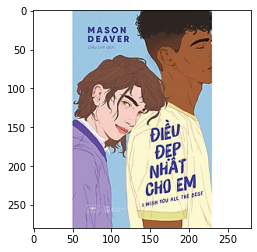

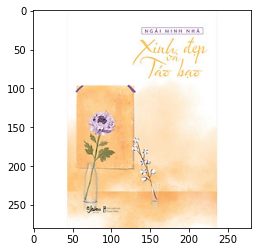

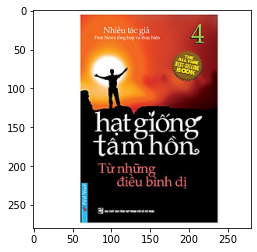

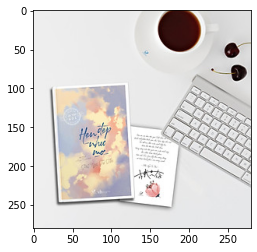

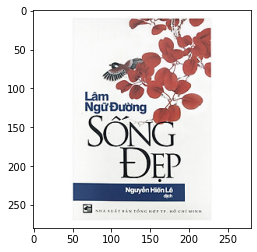

In [47]:
recommend_by_title(content_data, content_data.loc[3985,'name'])

Chúa Ruồi - Tiểu Thuyết (Nobel Văn Chương 1983)(Tái Bản 2020)
Sách văn học
                                                  name  big_category  \
282                  Dịch Hạch (Nobel Văn Chương 1957)  Sách văn học   
673                Nàng Tóc Đỏ (Nobel Văn Chương 2006)  Sách văn học   
598                                Ruồi Trâu (Tái Bản)  Sách văn học   
835  Những Người Đàn Bà (Tiểu Thuyết Văn Học Hiện Đại)  Sách văn học   
448                              Hỏa Dực - Tiểu Thuyết  Sách văn học   

                                 sub_category  
282                        Tác phẩm kinh điển  
673                        Tác phẩm kinh điển  
598                        Tác phẩm kinh điển  
835                               Tiểu Thuyết  
448   Truyện Giả tưởng - Huyền Bí - Phiêu Lưu  
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


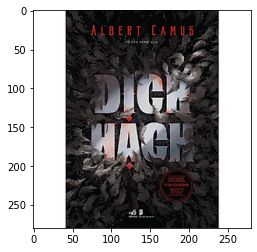

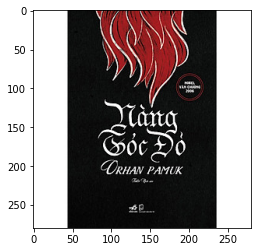

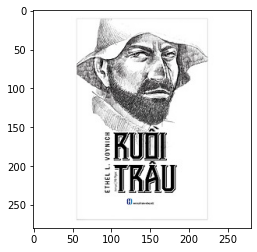

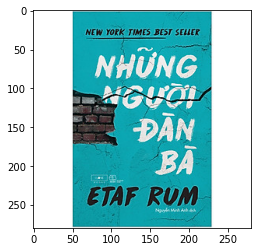

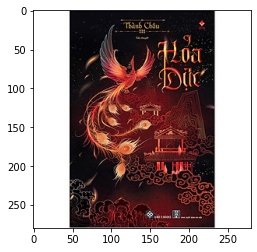

In [48]:
recommend_by_title(content_data, content_data.loc[3985,'name'], content_data.loc[3985,'big_category'])

Chúa Ruồi - Tiểu Thuyết (Nobel Văn Chương 1983)(Tái Bản 2020)
                                   name  big_category         sub_category
41    Dịch Hạch (Nobel Văn Chương 1957)  Sách văn học   Tác phẩm kinh điển
97  Nàng Tóc Đỏ (Nobel Văn Chương 2006)  Sách văn học   Tác phẩm kinh điển
86                  Ruồi Trâu (Tái Bản)  Sách văn học   Tác phẩm kinh điển
30    Cuốn Theo Chiều Gió (Tiểu Thuyết)  Sách văn học   Tác phẩm kinh điển
63                 Số Đỏ (Tái Bản 2020)  Sách văn học   Tác phẩm kinh điển
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


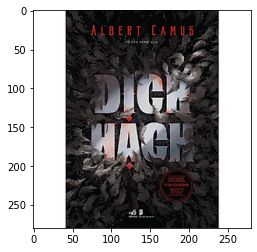

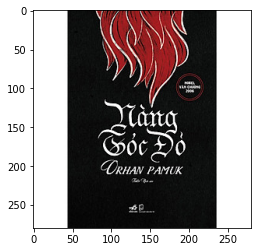

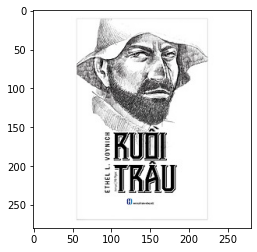

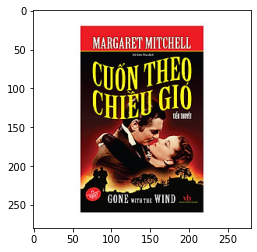

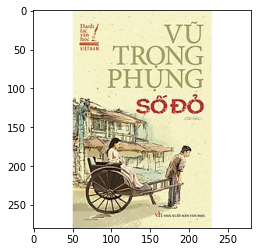

In [49]:
recommend_by_title(content_data, content_data.loc[3985,'name'], content_data.loc[3985,'big_category'], content_data.loc[3985,'sub_category'])

## 2. Recommend base on book description

In [50]:
def recommend_by_description(data, title, genre=None, sub_genre=None):
    print(title)
    if genre and not sub_genre:
        print(genre)
        data = data.loc[data['big_category']==genre]
        data.reset_index(level=0, inplace=True)
    elif genre and sub_genre:
        data = data.loc[data['big_category']==genre].loc[data['sub_category']==sub_genre]
        data.reset_index(level=0, inplace=True)

    # convert the index to series
    indices = pd.Series(data.index, index=data['name'])

    #Converting the book title into vectors
    tf = TfidfVectorizer()
    tfidf_matrix = tf.fit_transform(data['clean_description'])
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # get the index corresponding to original title
    idx = indices[title]

    # get the pairwise similarity score
    sig = list(enumerate(sg[idx]))

    # sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)

    # Scores of the most 5 similar books
    sig = sig[1:6]

    # book indices
    book_indices = [i[0] for i in sig]

    # top 5 
    rec = data[['name', 'thumbnail_url', 'big_category', 'sub_category']].iloc[book_indices]
    print(rec.drop('thumbnail_url', axis=1))
    # print
    for i in rec['thumbnail_url']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        print(plt.imshow(img))

Chúa Ruồi - Tiểu Thuyết (Nobel Văn Chương 1983)(Tái Bản 2020)
                                     name       big_category  \
4091          Tôi Buồn Chán, Tôi Vẽ Tranh       Sách văn học   
3970         Bố Con Cá Gai (Tái Bản 2019)       Sách văn học   
6156          Không Nỗ Lực Đừng Tham Vọng  Sách kỹ năng sống   
6056                       Bơ Đi Mà Sống   Sách kỹ năng sống   
6424  Sống Đời Đáng Sống - Nguyễn Hiến Lê  Sách kỹ năng sống   

                     sub_category  
4091             Truyện ngôn tình  
3970                  Tiểu Thuyết  
6156   Sách tư duy - Kỹ năng sống  
6056   Sách tư duy - Kỹ năng sống  
6424   Sách tư duy - Kỹ năng sống  
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


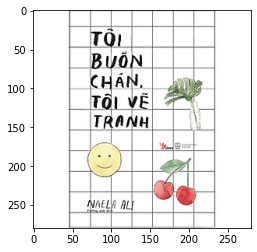

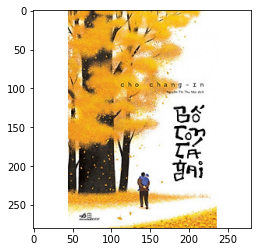

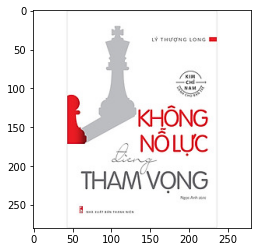

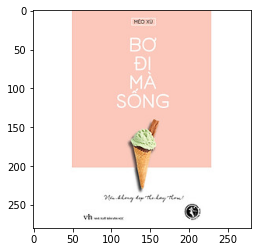

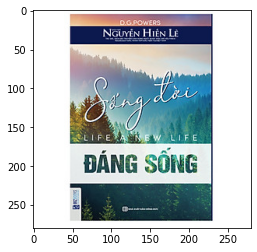

In [51]:
recommend_by_description(content_data, content_data.loc[3985,'name'])

Chúa Ruồi - Tiểu Thuyết (Nobel Văn Chương 1983)(Tái Bản 2020)
Sách văn học
                                                  name  big_category  \
721  Chiến Tranh Không Có Một Khuôn Mặt Phụ Nữ (Tái...  Sách văn học   
886                                         Mộ Đom Đóm  Sách văn học   
132           Chiến Tranh Và Hoà Bình (Trọn Bộ 02 Tập)  Sách văn học   
508                          Khu Vườn Mùa Hạ (Tái Bản)  Sách văn học   
864                          Cuộc Đời Của Pi (Tái Bản)  Sách văn học   

                         sub_category  
721                       Tiểu Thuyết  
886                    Truyện kinh dị  
132                Tác phẩm kinh điển  
508   Truyện ngắn - Tản văn - Tạp Văn  
864                       Tiểu Thuyết  
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


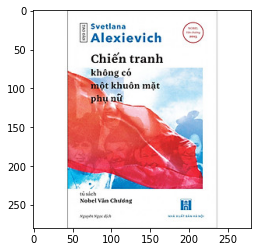

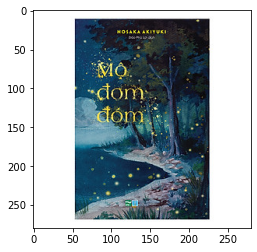

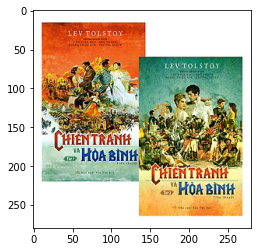

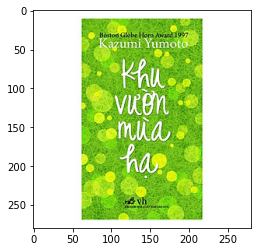

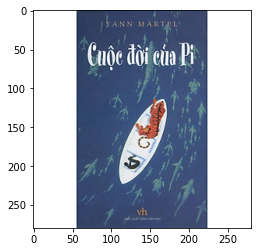

In [52]:
recommend_by_description(content_data, content_data.loc[3985,'name'], content_data.loc[3985,'big_category'])

Chúa Ruồi - Tiểu Thuyết (Nobel Văn Chương 1983)(Tái Bản 2020)
                                         name  big_category  \
18   Chiến Tranh Và Hoà Bình (Trọn Bộ 02 Tập)  Sách văn học   
106           Những Tấm Lòng Cao Cả (Tái Bản)  Sách văn học   
41          Dịch Hạch (Nobel Văn Chương 1957)  Sách văn học   
20       Những Tấm Lòng Cao Cả (Tái Bản 2020)  Sách văn học   
30          Cuốn Theo Chiều Gió (Tiểu Thuyết)  Sách văn học   

            sub_category  
18    Tác phẩm kinh điển  
106   Tác phẩm kinh điển  
41    Tác phẩm kinh điển  
20    Tác phẩm kinh điển  
30    Tác phẩm kinh điển  
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


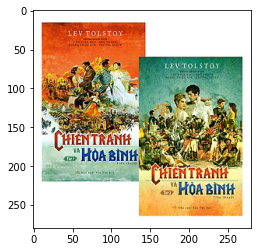

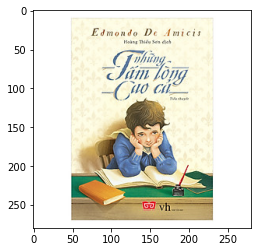

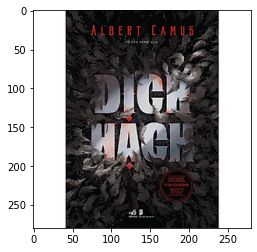

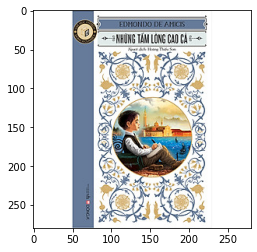

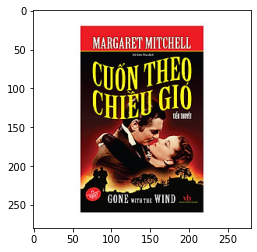

In [53]:
recommend_by_description(content_data, content_data.loc[3985,'name'], content_data.loc[3985,'big_category'], content_data.loc[3985, 'sub_category'])

In [1]:
print([1, 3, 4] + [1, 6, 7])

[1, 3, 4, 1, 6, 7]
